# HK Racing
## Introduction
After much testing, given that the problem cannot be solved with regression / numeric operations, tree type algorithms are more appropriate. As a starting point, Random Forest with > 6000 races are used to avoid overfitting.

## Preliminaries
In this notebook, we will be using scikit-learn's Random Forest, Pandas, NumPy, and Matplotlib

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Data Import
In this section, we are going to use the HKRacing dataset from Kaggle
<br>
(https://www.kaggle.com/gdaley/hkracing/)

In [5]:
data_path = '../data/'
data_subdomain = 'hkracing/'

df_races = pd.read_csv(data_path + data_subdomain + 'races.csv', date_parser=['date'])
df_runs = pd.read_csv(data_path + data_subdomain + 'runs.csv')

## Data Preprocessing

In [6]:
df_races['horse_ratings_lower'] = df_races['horse_ratings'].str.split('-').str[0]
df_races['horse_ratings_upper'] = df_races['horse_ratings'].str.split('-').str[1]

df_runs['weight_difference'] = df_runs['declared_weight'] - df_runs['actual_weight']
df_runs['weight_difference_percentage'] = df_runs['weight_difference'] / df_runs['actual_weight']

In [7]:
df_all = df_runs.merge(df_races, left_on='race_id', right_on='race_id', how='inner')
df_all['prize'].fillna(0, inplace=True)

In [8]:
df_race_agg = df_all.groupby('race_id').agg({
    'horse_id': 'count',
    'horse_age': ['mean', 'std'],
    'horse_rating': ['mean', 'std'],
    'declared_weight': ['mean', 'std'],
    'actual_weight': ['mean', 'std'],
    'weight_difference': ['mean', 'std'],
    'weight_difference_percentage': ['mean', 'std']
}).reset_index()

df_race_agg.columns = [
    'race_id', 
    'horse_count',
    'horse_age_mean',
    'horse_age_std',
    'horse_rating_mean',
    'horse_rating_std',
    'declared_weight_mean',
    'declared_weight_std',
    'actual_weight_mean',
    'actual_weight_std',
    'weight_difference_mean',
    'weight_difference_std',
    'weight_difference_percentage_mean',
    'weight_difference_percentage_std'
]

df_all = df_all.merge(df_race_agg, left_on='race_id', right_on='race_id', how='inner')

In [9]:
jockeys = list(df_all['jockey_id'].unique())

df_jockeys = None

for jockey in jockeys:
    
    df_jockey = df_all[df_all['jockey_id'] == jockey].sort_values(by=['date', 'race_no'])
    df_jockey['jockey_win_rate_5'] = np.where(df_jockey['result'] < 3, 1, 0)
    df_jockey['jockey_win_rate_5'] = df_jockey['jockey_win_rate_5'].rolling(5).sum() / 5
    df_jockey['jockey_horse_age_5'] = df_jockey['horse_age'].rolling(5).mean()
    df_jockey['jockey_horse_rating_5'] = df_jockey['horse_rating'].rolling(5).mean()
    df_jockey['jockey_weight_difference_percentage_5'] = df_jockey['weight_difference_percentage'].rolling(5).mean()
    df_jockey = df_jockey[
        [
            'race_id', 'jockey_id', 'jockey_win_rate_5', 'jockey_horse_age_5', 'jockey_horse_rating_5', 'jockey_weight_difference_percentage_5'
        ]
    ]
    df_jockey.dropna(inplace=True)
    
    if df_jockeys is None:
        
        df_jockeys = df_jockey
        
    else:
        
        df_jockeys = df_jockeys.append(df_jockey)
    
    
# df_jockeys

,race_id,jockey_id,jockey_win_rate_5,jockey_horse_age_5,jockey_horse_rating_5,jockey_weight_difference_percentage_5
56,4,2,0.4,3.0,60.0,7.689686
68,5,2,0.4,3.0,60.0,7.874649
94,7,2,0.2,3.0,60.0,7.857398
110,8,2,0.2,3.0,60.0,7.987044
127,9,2,0.0,3.0,60.0,7.595555
140,10,2,0.0,3.0,60.0,7.546435
150,11,2,0.0,3.0,60.0,7.586988
161,12,2,0.0,3.0,60.0,7.568966
175,13,2,0.2,3.0,60.0,7.506038
188,14,2,0.2,3.0,60.0,7.547627


In [10]:
horses = list(df_all['horse_id'].unique())

df_horses = None

for horse in horses:
    
    df_horse = df_all[df_all['horse_id'] == horse].sort_values(by=['date', 'race_no'])
    df_horse['horse_win_rate_5'] = np.where(df_horse['result'] < 3, 1, 0)
    df_horse['horse_win_rate_5'] = df_horse['horse_win_rate_5'].rolling(5).sum() / 5
    df_horse['horse_race_count'] = (df_horse['horse_id'] == horse).cumsum()
    df_horse['horse_horse_rating_5'] = df_horse['horse_rating'].rolling(5).mean()
    df_horse['horse_weight_difference_percentage_5'] = df_horse['weight_difference_percentage'].rolling(5).mean()
    df_horse = df_horse[
        [
            'race_id', 'horse_id', 'horse_win_rate_5', 'horse_race_count', 'horse_horse_rating_5', 'horse_weight_difference_percentage_5'
        ]
    ]
    df_horse.dropna(inplace=True)
    
    if df_horses is None:
        
        df_horses = df_horse
        
    else:
        
        df_horses = df_horses.append(df_horse)
    
    
# df_horses

,race_id,horse_id,horse_win_rate_5,horse_race_count,horse_horse_rating_5,horse_weight_difference_percentage_5
2497,199,3917,0.4,5,60.0,6.791262
2961,236,3917,0.4,6,60.0,7.029842
3246,258,3917,0.4,7,60.0,7.246229
3603,286,3917,0.4,8,60.0,7.444004
3922,312,3917,0.2,9,60.0,7.611868
4261,339,3917,0.0,10,60.0,7.769979
4877,390,3917,0.0,11,60.0,7.733159
5618,452,3917,0.0,12,60.0,7.515268
6474,520,3917,0.0,13,60.0,7.311385
7038,565,3917,0.2,14,60.0,7.131214


In [11]:
trainers = list(df_all['trainer_id'].unique())

df_trainers = None

for trainer in trainers:
    
    df_trainer = df_all[df_all['trainer_id'] == trainer].sort_values(by=['date', 'race_no'])
    df_trainer['trainer_win_rate_5'] = np.where(df_trainer['result'] < 3, 1, 0)
    df_trainer['trainer_win_rate_5'] = df_trainer['trainer_win_rate_5'].rolling(5).sum() / 5
    df_trainer = df_trainer[
        [
            'race_id', 'trainer_id', 'trainer_win_rate_5'
        ]
    ]
    df_trainer.dropna(inplace=True)
    
    if df_trainers is None:
        
        df_trainers = df_trainer
        
    else:
        
        df_trainers = df_trainers.append(df_trainer)
    
    
# df_trainers

In [12]:
df_all = df_all.merge(df_jockeys, left_on=['race_id', 'jockey_id'], right_on=['race_id', 'jockey_id'], how='inner')
df_all = df_all.merge(df_horses, left_on=['race_id', 'horse_id'], right_on=['race_id', 'horse_id'], how='inner')
df_all = df_all.merge(df_trainers, left_on=['race_id', 'trainer_id'], right_on=['race_id', 'trainer_id'], how='inner')

In [13]:
for t in df_all.horse_type.unique():
    
    df_all['horse_type_' + t.lower()] = np.where(df_all['horse_type'] == t, 1, 0)
    
for t in df_all.horse_country.unique():
    
    df_all['horse_country_' + t.lower()] = np.where(df_all['horse_country'] == t, 1, 0)
    
for t in df_all.venue.unique():
    
    df_all['venue_' + t.lower()] = np.where(df_all['venue'] == t, 1, 0)
    
for t in df_all.surface.unique():
    
    df_all['surface_' + str(t).lower()] = np.where(df_all['surface'] == t, 1, 0)
    
for t in df_all.horse_gear.unique():
    
    df_all['horse_gear_' + t.lower()] = np.where(df_all['horse_gear'] == t, 1, 0)
    
df_all['going_good'] = np.where(df_all['going'].str.contains('GOOD'), 1, 0)
df_all['going_firm'] = np.where(df_all['going'].str.contains('FIRM'), 1, 0)
df_all['going_fast'] = np.where(df_all['going'].str.contains('FAST'), 1, 0)
df_all['going_yielding'] = np.where(df_all['going'].str.contains('YIELDING'), 1, 0)
df_all['going_soft'] = np.where(df_all['going'].str.contains('SOFT'), 1, 0)
df_all['going_slow'] = np.where(df_all['going'].str.contains('SLOW'), 1, 0)

In [29]:
df_rf = df_all.drop(
    [
        'horse_id', 'won', 'jockey_id', 'trainer_id',
        'horse_age', 'horse_country', 'horse_type', 'horse_rating', 'horse_gear', 
        'declared_weight', 'actual_weight', 'position_sec1', 'position_sec2',
        'position_sec3', 'position_sec4', 'position_sec5', 'position_sec6',
        'behind_sec1', 'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5', 
        'behind_sec6', 'time1_x', 'time2_x', 'time3_x', 'time4_x', 'time5_x', 
        'time6_x', 'venue', 'race_no', 'date', 'config', 'result',
        'going', 'sec_time1', 'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 
        'sec_time6', 'sec_time7', 'time1_y', 'time2_y', 'time3_y', 'time4_y', 
        'time5_y', 'time6_y', 'time7', 'place_combination1', 'place_combination2',
        'place_combination3', 'place_combination4', 'place_dividend1',
        'place_dividend2', 'place_dividend3', 'place_dividend4',
        'win_combination1', 'win_dividend1', 'win_combination2',
        'win_dividend2', 'lengths_behind', 'place_odds', 'horse_ratings_lower', 
        'horse_ratings_upper', 'horse_ratings'
    ], 
    axis=1)

In [30]:
df_rf.drop(df_rf.columns[[x.startswith('horse_gear') for x in df_rf.columns]], axis=1, inplace=True)
df_rf.drop_duplicates(inplace=True)

In [31]:
df_rf_fit = df_rf[:int(len(df_rf) * 0.8)]
df_rf_walk = df_rf[int(len(df_rf) * 0.8):]

Y = df_rf_fit['finish_time'].values
X = df_rf_fit.drop(['finish_time', 'race_id', 'horse_no'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

## Random Foreest

In [32]:
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
y_pred = forest.predict(X_test)

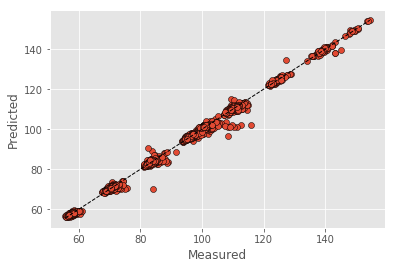

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Testing

In [35]:
races = (df_rf_walk.groupby('race_id').agg({'race_id': 'count'}) > 10).index.tolist()

In [38]:
temp = len(races)
print(temp)
# hit = 0
balance = [0]

for race in races:
    
    trial = df_rf_walk[df_rf_walk['race_id'] == race]
    
    if len(trial) < trial['horse_count'].max():
        
        continue
        
    Y_trial = trial['finish_time'].values
    X_trial = trial.drop(['finish_time', 'race_id', 'horse_no'], axis=1)
    y_pred = forest.predict(X_trial)
    
    results = pd.DataFrame(y_pred, columns=['predicted_finishing_time'])
    results = pd.concat([results, pd.DataFrame(Y_trial, columns=['actual_finishing_time'])], axis=1)
    results = results = pd.concat([results, trial[['win_odds', 'horse_no']].reset_index(drop=True)], axis=1)
    
    results = results.sort_values(by='predicted_finishing_time').reset_index(drop=True).reset_index()
    results = results.sort_values(by='actual_finishing_time').reset_index(drop=True).reset_index()
    results.columns=['actual_rank', 'predicted_rank', 'predicted_finishing_time', 'actual_finishing_time', 'win_odds', 'horse_no']
    
    odds = results[(results['predicted_rank'] == 0)]['win_odds'].values[0]
    
    if odds < 5:
        
        balance.append(balance[-1])
    
    elif len(results[(results['predicted_rank'] == 0) & (results['actual_rank'] == 0)]) == 1:
            
        balance.append(balance[-1] + 10 * odds)
        
    else:
        
        balance.append(balance[-1] - 10)

1197


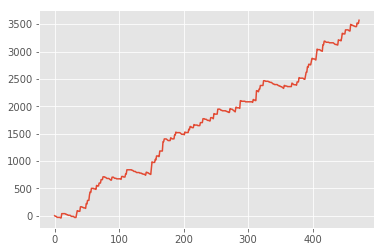

In [39]:
plt.plot(balance)

In [28]:
df_all[['place_combination1', 'place_combination2', 'place_combination3']]

,place_combination1,place_combination2,place_combination3
0,10,4,11.0
1,3,8,9.0
2,1,8,5.0
3,1,8,5.0
4,1,8,5.0
5,1,8,5.0
6,1,8,5.0
7,5,1,4.0
8,1,5,11.0
9,4,3,5.0


In [40]:
X_trial.columns

Index(['draw', 'win_odds', 'weight_difference', 'weight_difference_percentage',
       'surface', 'distance', 'prize', 'race_class', 'horse_count',
       'horse_age_mean', 'horse_age_std', 'horse_rating_mean',
       'horse_rating_std', 'declared_weight_mean', 'declared_weight_std',
       'actual_weight_mean', 'actual_weight_std', 'weight_difference_mean',
       'weight_difference_std', 'weight_difference_percentage_mean',
       'weight_difference_percentage_std', 'jockey_win_rate_5',
       'jockey_horse_age_5', 'jockey_horse_rating_5',
       'jockey_weight_difference_percentage_5', 'horse_win_rate_5',
       'horse_race_count', 'horse_horse_rating_5',
       'horse_weight_difference_percentage_5', 'trainer_win_rate_5',
       'horse_type_gelding', 'horse_type_brown', 'horse_type_horse',
       'horse_type_rig', 'horse_type_colt', 'horse_type_mare',
       'horse_type_grey', 'horse_type_filly', 'horse_type_roan',
       'horse_country_nz', 'horse_country_usa', 'horse_country_saf'